In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
# Load data
data = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
 
# Get features (pictures) and labels (persons)
_, h, w = data.images.shape # h is height, w is width
X = data.data
y = data.target
X.shape, y.shape

((1140, 1850), (1140,))

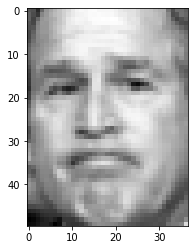

In [3]:
# Show example image
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)

In [4]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((798, 1850), (342, 1850), (798,), (342,))

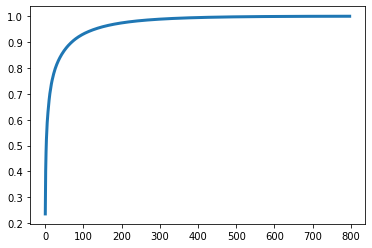

In [5]:
# Fit pipeline
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([('scaler', scaler), ('pca', pca)]).fit(X_train)

# Plot cummulated explained variance
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [6]:
# Check how many principal components are needed to keep 90% variance
n_comps = np.where(pca.explained_variance_ratio_.cumsum() >= .90)[0][0]
n_comps

70

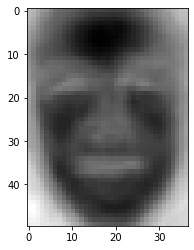

In [7]:
# Set number of principal components 
pca.n_comps = n_comps

# Refit pipeline
pipe.fit(X_train)

# Get eigenfaces aka the principal components
eigenfaces = pca.components_

# Show example image
plt.imshow(eigenfaces[0].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

In [8]:
# Train SVM with principal components
clf = SVC(kernel='linear').fit(pipe.transform(X_train), y_train)

# Predict labels
y_test_pred = clf.predict(pipe.transform(X_test))

# Show test score
accuracy_score(y_test, y_test_pred)

0.8947368421052632